In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("experiment-data-11000.csv")
df = df.rename(columns={'count turtles with [state = "S"]': "Susceptible", 'count turtles with [state = "I"]': "Infected", 'count turtles with [state = "R"]': "Removed"})

In [3]:
df.head()

,[run number],num-turtles,auto-infect,infection-chance,vaccination-rate,[step],Susceptible,Infected,Removed
0,1,250,True,0.2,0.0,0,247,3,0
1,1,250,True,0.2,0.0,1,246,4,0
2,1,250,True,0.2,0.0,2,246,4,0
3,1,250,True,0.2,0.0,3,243,7,0
4,1,250,True,0.2,0.0,4,241,9,0


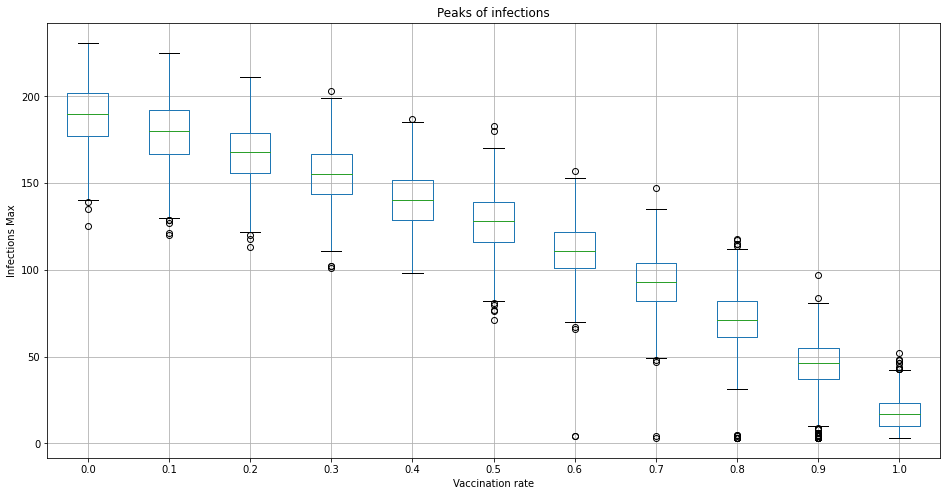

In [4]:
maxInfectionsPerRun = df[["[run number]", "vaccination-rate", "Infected"]].groupby(["[run number]"]).max()

allPercs = pd.DataFrame()

for perc in maxInfectionsPerRun["vaccination-rate"].unique():
  currentPerc = maxInfectionsPerRun[maxInfectionsPerRun["vaccination-rate"] == perc]
  values = currentPerc["Infected"].values
  allPercs[perc] = values

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Infections Max")
ax.set_xlabel("Vaccination rate")
allPercs.plot(kind="box", ax=ax, title="Peaks of infections", grid=True)

plt.show()

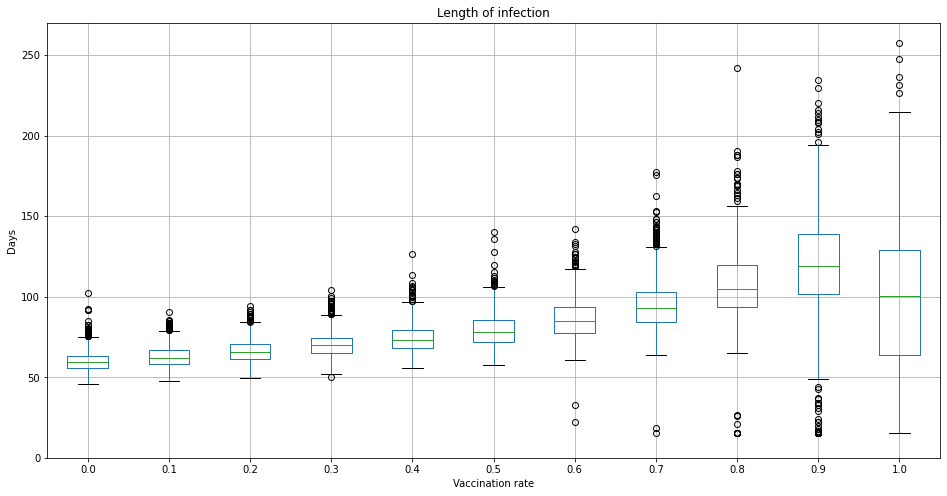

In [18]:
maxStepsPerRun = df[["[run number]", "vaccination-rate", "[step]"]].groupby(["[run number]"]).max()

allPercs = pd.DataFrame()

for perc in maxStepsPerRun["vaccination-rate"].unique():
  currentPerc = maxStepsPerRun[maxStepsPerRun["vaccination-rate"] == perc]
  values = currentPerc["[step]"].values
  values = values / 4
  allPercs[perc] = values

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Days")
ax.set_xlabel("Vaccination rate")
allPercs.plot(kind="box", ax=ax, title="Length of infection", grid=True)

plt.ylim(0, 270)
plt.show()

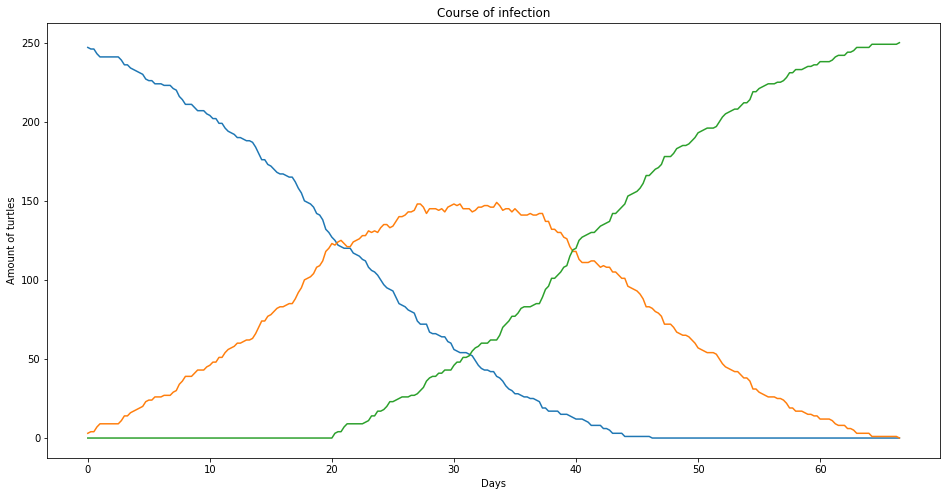

In [6]:
currentRun = df[["[step]", "Susceptible", "Infected", "Removed"]][df["[run number]"] == 1]
color_dict = {'Susceptible': 'b', 'Infected': 'r', "Removed": "g"}

currentRun["[step]"] = currentRun["[step]"] / 4

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of turtles")
ax.set_xlabel("Days")
ax.set_title("Course of infection")

plt.plot(currentRun["[step]"], currentRun[["Susceptible", "Infected", "Removed"]])
plt.show()

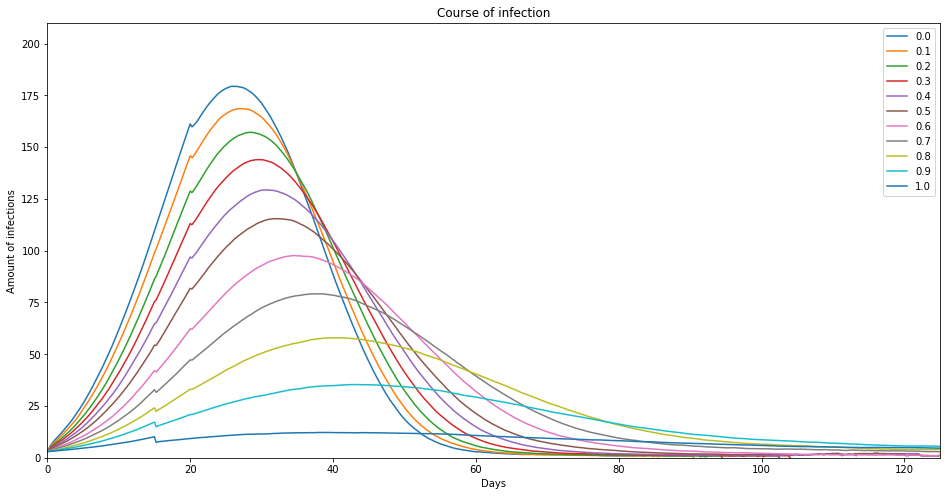

In [47]:
fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of infections")
ax.set_xlabel("Days")
ax.set_title("Course of infection")

labels = []

for perc in df["vaccination-rate"].unique():
  currentRun = df[["[step]", "Susceptible", "Infected", "Removed"]][df["vaccination-rate"] == perc]
  currentRun["[step]"] = currentRun["[step]"] / 4
  currentRun = currentRun.groupby("[step]").mean()
  labels.append(perc)


  plt.plot(currentRun[["Infected"]])
plt.xlim(0, 125)
plt.ylim(0, 210)
plt.legend(labels)
plt.show()

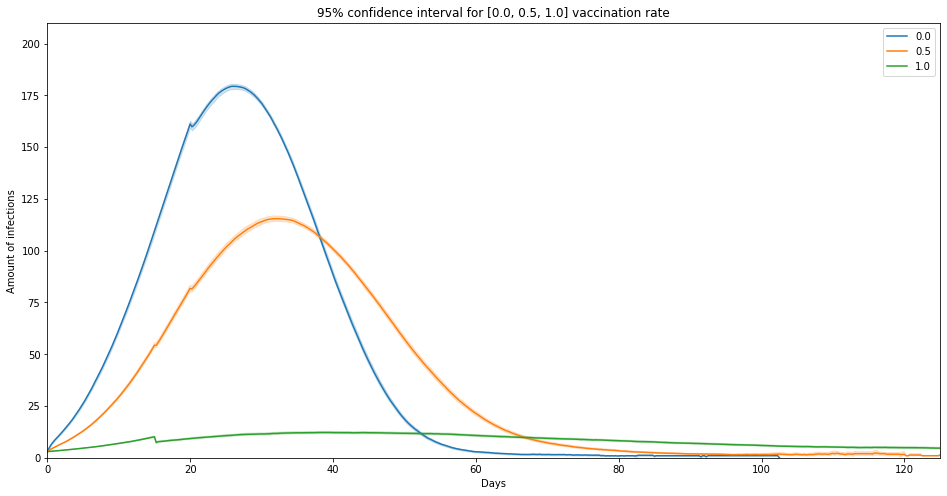

In [50]:
labels = [0.0, 0.5, 1.0]

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of infections")
ax.set_xlabel("Days")
title = "95% confidence interval for " + str(labels) + " vaccination rate"
ax.set_title(title)

for currentRate in labels:
  currentDf = df[df["vaccination-rate"] == currentRate][["[run number]", "[step]", "Infected"]]
  currentDf["[step]"] = currentDf["[step]"] / 4
  plt.xlim(0, 125)
  plt.ylim(0, 210)
  sns.lineplot(data=currentDf, x="[step]", y="Infected")

plt.legend(labels)
plt.show()

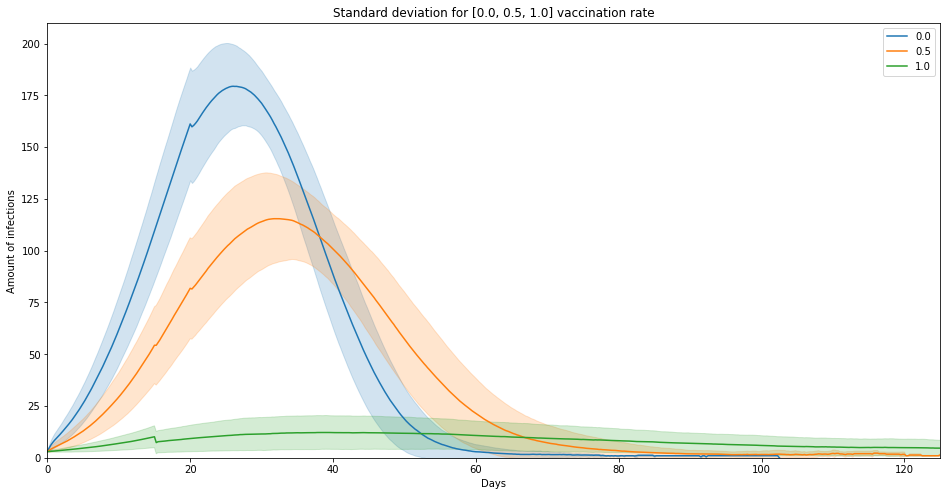

In [51]:
labels = [0.0, 0.5, 1.0]

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of infections")
ax.set_xlabel("Days")
title = "Standard deviation for " + str(labels) + " vaccination rate"
ax.set_title(title)

for currentRate in labels:
  currentDf = df[df["vaccination-rate"] == currentRate][["[run number]", "[step]", "Infected"]]
  currentDf["[step]"] = currentDf["[step]"] / 4
  plt.xlim(0, 125)
  plt.ylim(0, 210)
  sns.lineplot(data=currentDf, x="[step]", y="Infected", ci="sd")

plt.legend(labels)
plt.show()

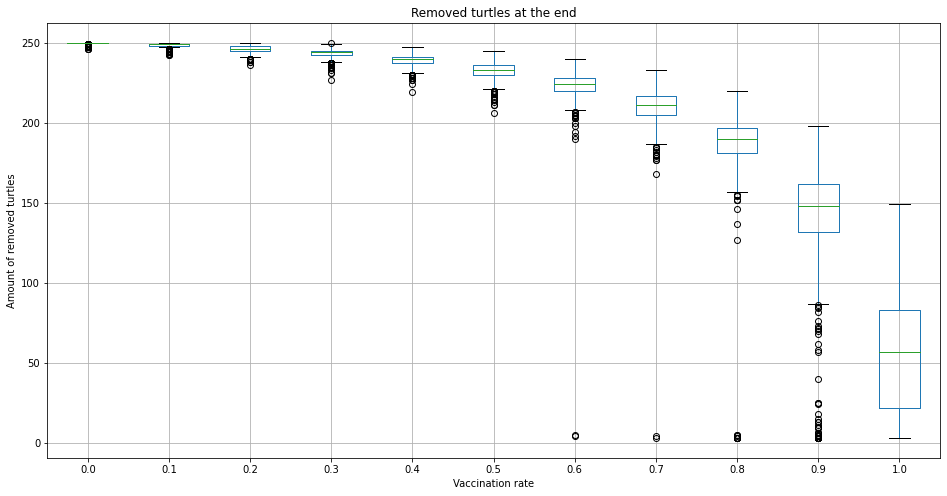

In [14]:
maxInfectionsPerRun = df[["[run number]", "vaccination-rate", "Removed"]].groupby(["[run number]"]).max()

allPercs = pd.DataFrame()

for perc in maxInfectionsPerRun["vaccination-rate"].unique():
  currentPerc = maxInfectionsPerRun[maxInfectionsPerRun["vaccination-rate"] == perc]
  values = currentPerc["Removed"].values
  allPercs[perc] = values

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of removed turtles")
ax.set_xlabel("Vaccination rate")
allPercs.plot(kind="box", ax=ax, title="Removed turtles at the end", grid=True)

plt.show()

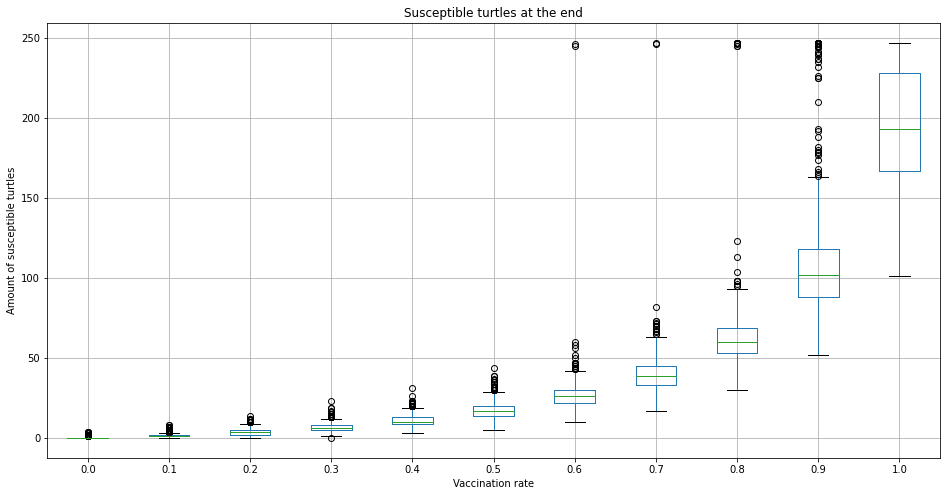

In [17]:
maxInfectionsPerRun = df[["[run number]", "vaccination-rate", "Susceptible"]].groupby(["[run number]"]).min()

allPercs = pd.DataFrame()

for perc in maxInfectionsPerRun["vaccination-rate"].unique():
  currentPerc = maxInfectionsPerRun[maxInfectionsPerRun["vaccination-rate"] == perc]
  values = currentPerc["Susceptible"].values
  allPercs[perc] = values

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax.set_ylabel("Amount of susceptible turtles")
ax.set_xlabel("Vaccination rate")
allPercs.plot(kind="box", ax=ax, title="Susceptible turtles at the end", grid=True)

plt.show()